**Developed by Aylar - Taher**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Breast_Cancer.csv to Breast_Cancer.csv


In [4]:
df = pd.read_csv("Breast_Cancer.csv")
df.sample(5)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
2346,47,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,21,Positive,Positive,16,3,76,Alive
3173,68,White,Widowed,T1,N1,IIA,Moderately differentiated,2,Regional,15,Positive,Positive,7,2,89,Alive
3057,61,White,Married,T2,N3,IIIC,Moderately differentiated,2,Regional,30,Positive,Positive,12,11,81,Alive
1606,55,White,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,10,3,66,Alive
2939,50,White,Married,T3,N1,IIIA,Moderately differentiated,2,Regional,75,Positive,Positive,19,2,85,Alive


In [5]:
df['Race'].replace(['White','Black','Other'],[0,1,2],inplace=True)
df['Marital Status'].replace(['Married' ,'Single','Divorced','Widowed','Separated'],[0,1,2,3,4],inplace=True)
df['Status'].replace(['Alive' ,'Dead'],[0,1],inplace=True)
df[['Race','Marital Status']]

,Race,Marital Status
0,0,0
1,0,0
2,0,2
3,0,0
4,0,0
...,...,...
4019,2,0
4020,0,2
4021,0,0
4022,1,2


In [6]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [7]:
df1=df[['Age','Race','Tumor Size','Regional Node Examined','Reginol Node Positive','Survival Months','Status']]
df1

,Age,Race,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,0,4,24,1,60,0
1,50,0,35,14,5,62,0
2,58,0,63,14,7,75,0
3,58,0,18,2,1,84,0
4,47,0,41,3,1,50,0
...,...,...,...,...,...,...,...
4019,62,2,9,1,1,49,0
4020,56,0,46,14,8,69,0
4021,68,0,22,11,3,69,0
4022,58,1,44,11,1,72,0


In [8]:
df1.columns

Index(['Age', 'Race', 'Tumor Size', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

<Axes: >

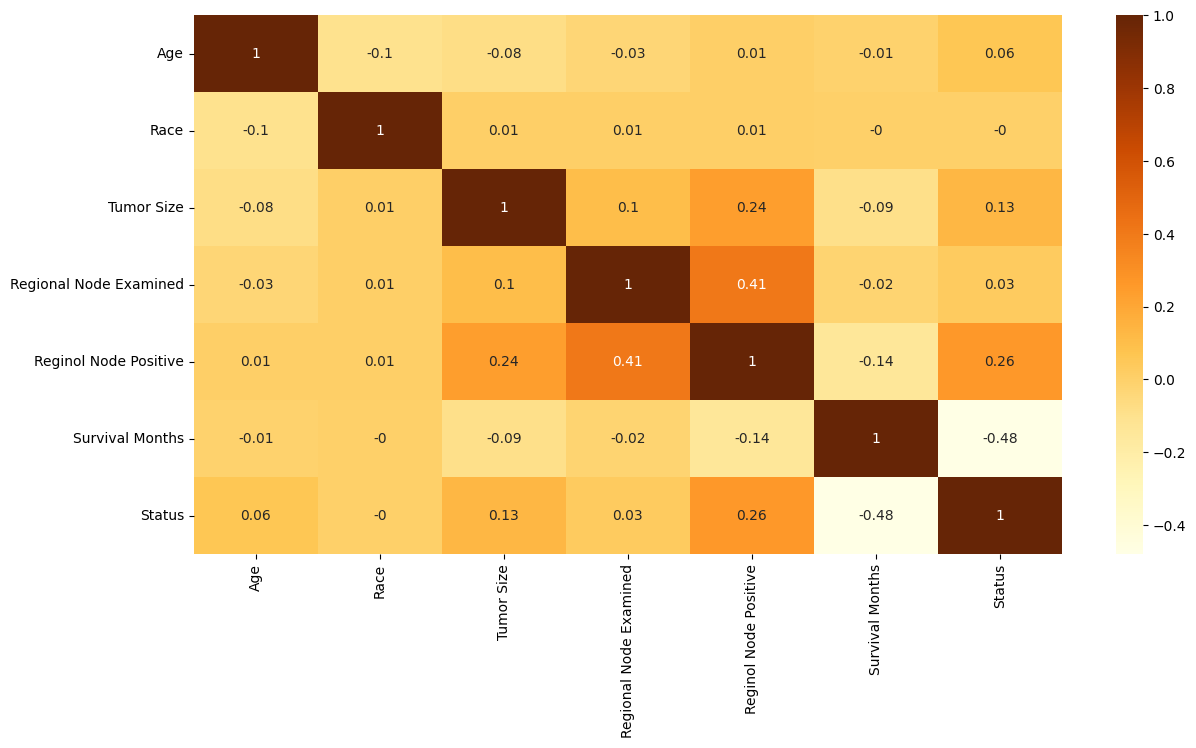

In [9]:
correlation = df1.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

<Axes: xlabel='Status', ylabel='count'>

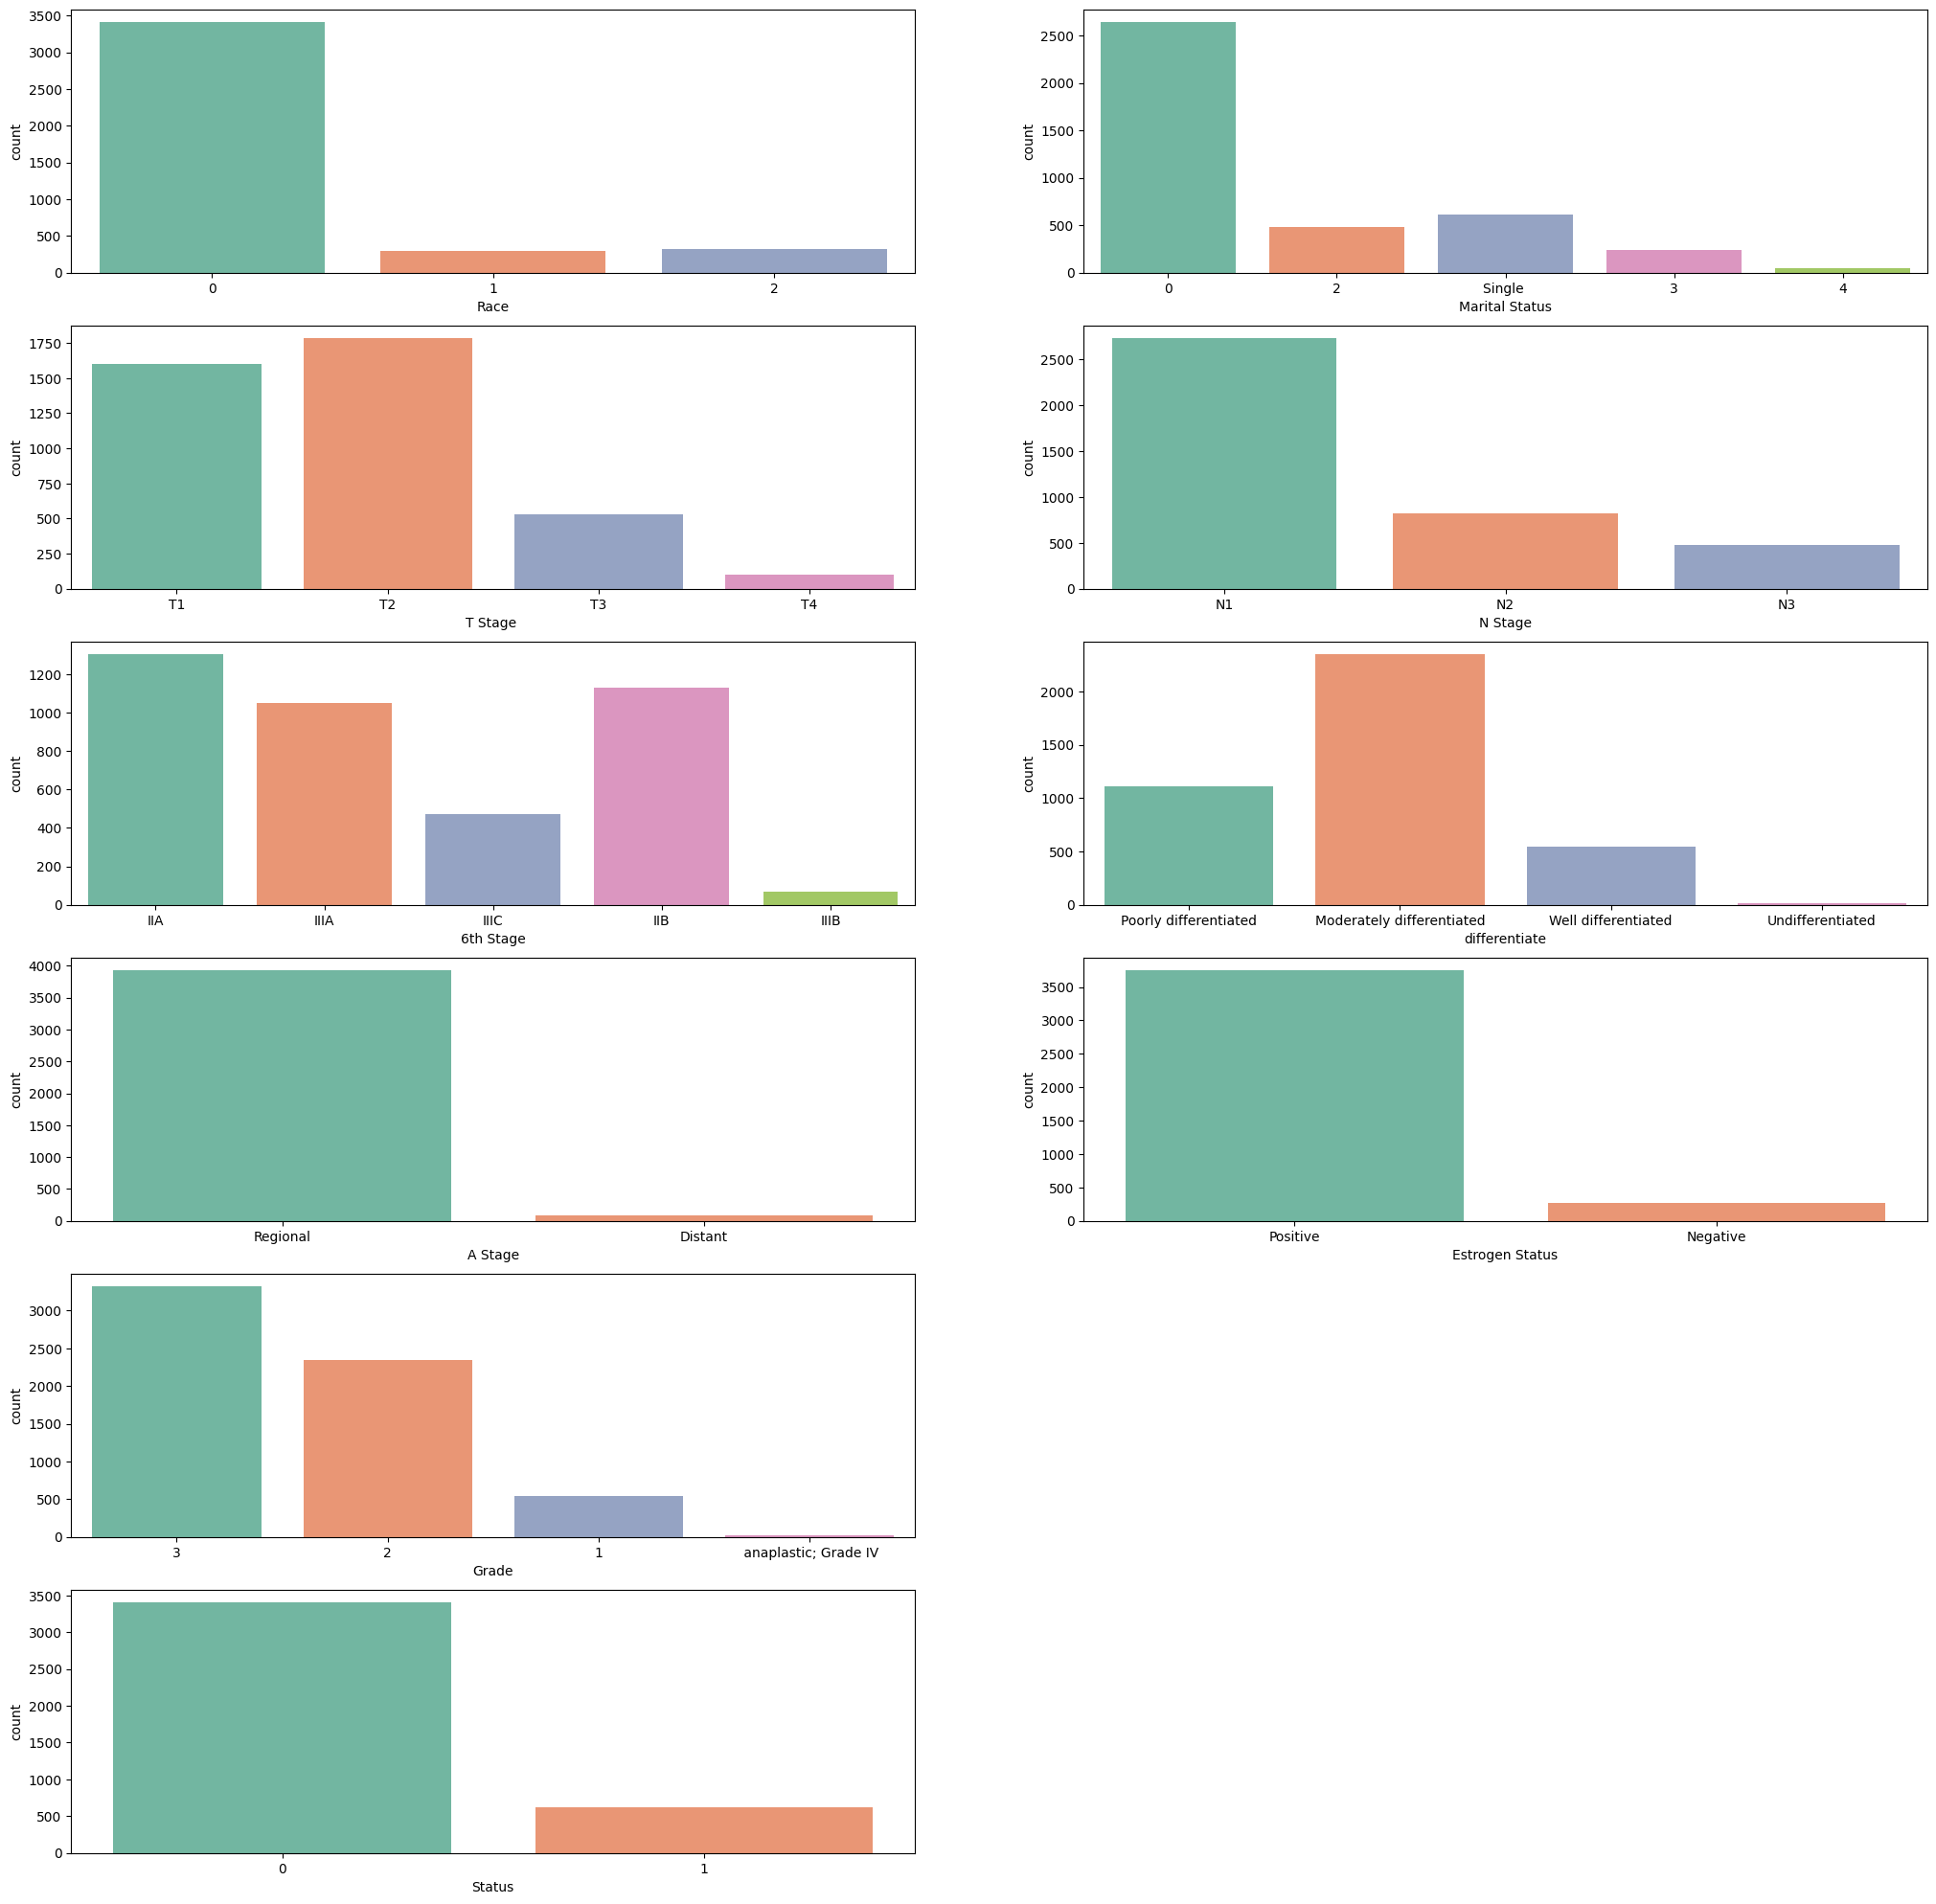

In [12]:
plt.figure(figsize = (25,25))

plt.subplot(6,2,1)
sns.countplot(x = 'Race', palette='Set2', data = df)

plt.subplot(6,2,2)
sns.countplot(x = 'Marital Status', palette='Set2', data = df)

plt.subplot(6,2,3)
sns.countplot(x = 'T Stage ', palette='Set2', data = df)

plt.subplot(6,2,4)
sns.countplot(x = 'N Stage', palette='Set2', data = df)

plt.subplot(6,2,5)
sns.countplot(x = '6th Stage', palette='Set2', data = df)

plt.subplot(6,2,6)
sns.countplot(x = 'differentiate', palette='Set2', data = df)

plt.subplot(6,2,7)
sns.countplot(x = 'A Stage', palette='Set2', data = df)

plt.subplot(6,2,8)
sns.countplot(x = 'Estrogen Status', palette='Set2', data = df)

plt.subplot(6,2,9)
sns.countplot(x = 'Progesterone Status', palette='Set2', data = df)

plt.subplot(6,2,9)
sns.countplot(x = 'Grade', palette='Set2', data = df)

plt.subplot(6,2,11)
sns.countplot(x = 'Status', palette='Set2', data = df)

In [10]:
df['Race'].value_counts()

0    3413
2     320
1     291
Name: Race, dtype: int64

In [11]:
df['Marital Status'].value_counts()

0          2643
Single      615
2           486
3           235
4            45
Name: Marital Status, dtype: int64

In [13]:
df['T Stage '].value_counts()

T2    1786
T1    1603
T3     533
T4     102
Name: T Stage , dtype: int64

In [14]:
df['N Stage'].value_counts()

N1    2732
N2     820
N3     472
Name: N Stage, dtype: int64

In [15]:
df['6th Stage'].value_counts()

IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: 6th Stage, dtype: int64

In [16]:
df['differentiate'].value_counts()

Moderately differentiated    2351
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: differentiate, dtype: int64

<Axes: xlabel='Status', ylabel='count'>

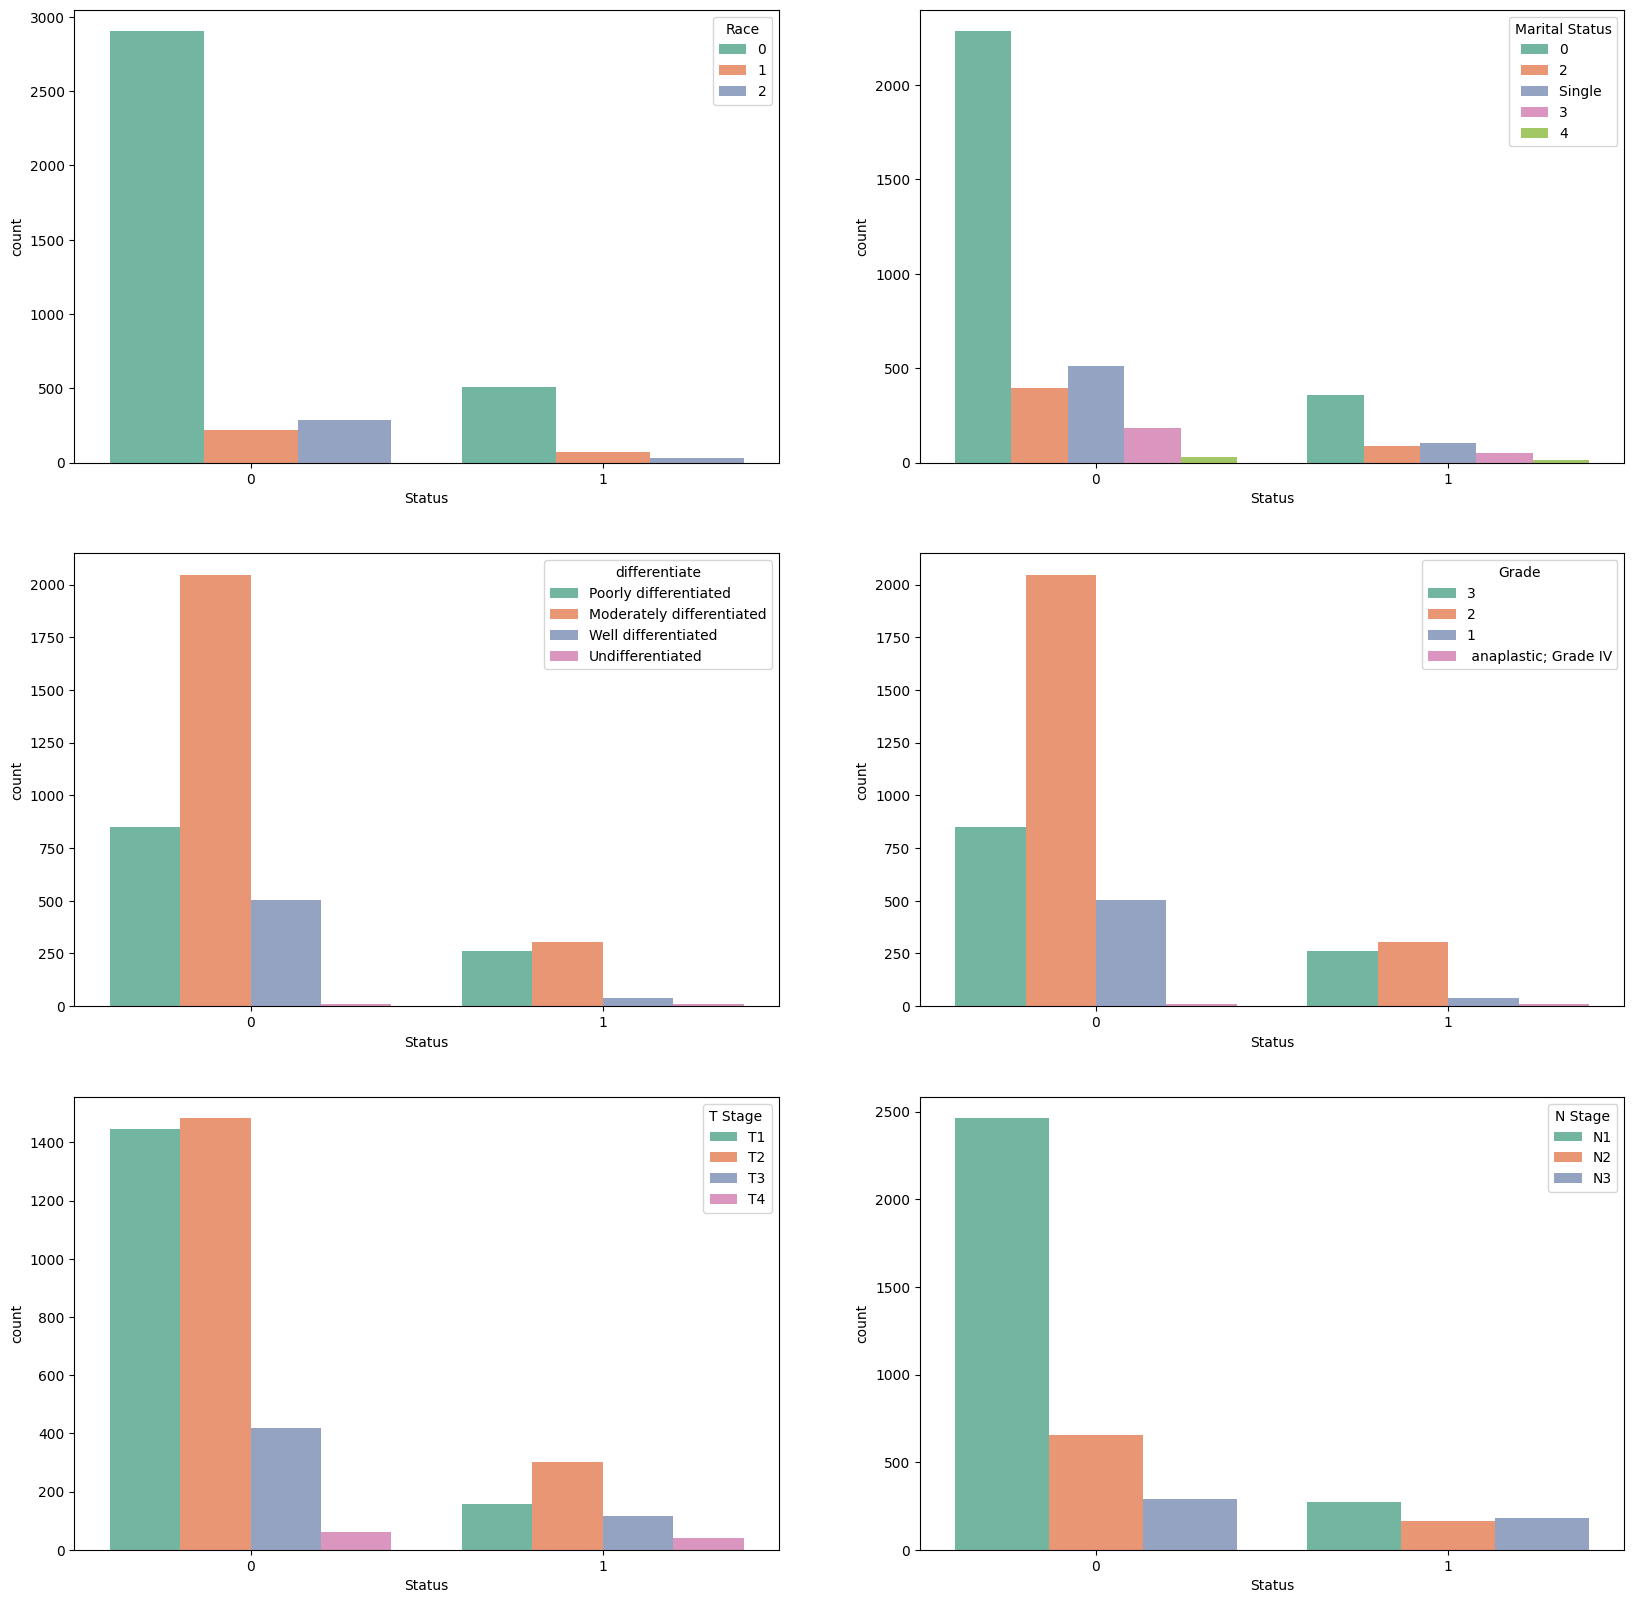

In [17]:
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
sns.countplot(x = 'Status', hue= 'Race', palette='Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'Status', hue= 'Marital Status', palette='Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'Status', hue= 'differentiate', palette='Set2', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'Status', hue= 'Grade', palette='Set2', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'Status', hue= 'T Stage ', palette='Set2', data = df)

plt.subplot(3,2,6)
sns.countplot(x = 'Status', hue= 'N Stage', palette='Set2', data = df)

<Axes: xlabel='Status', ylabel='count'>

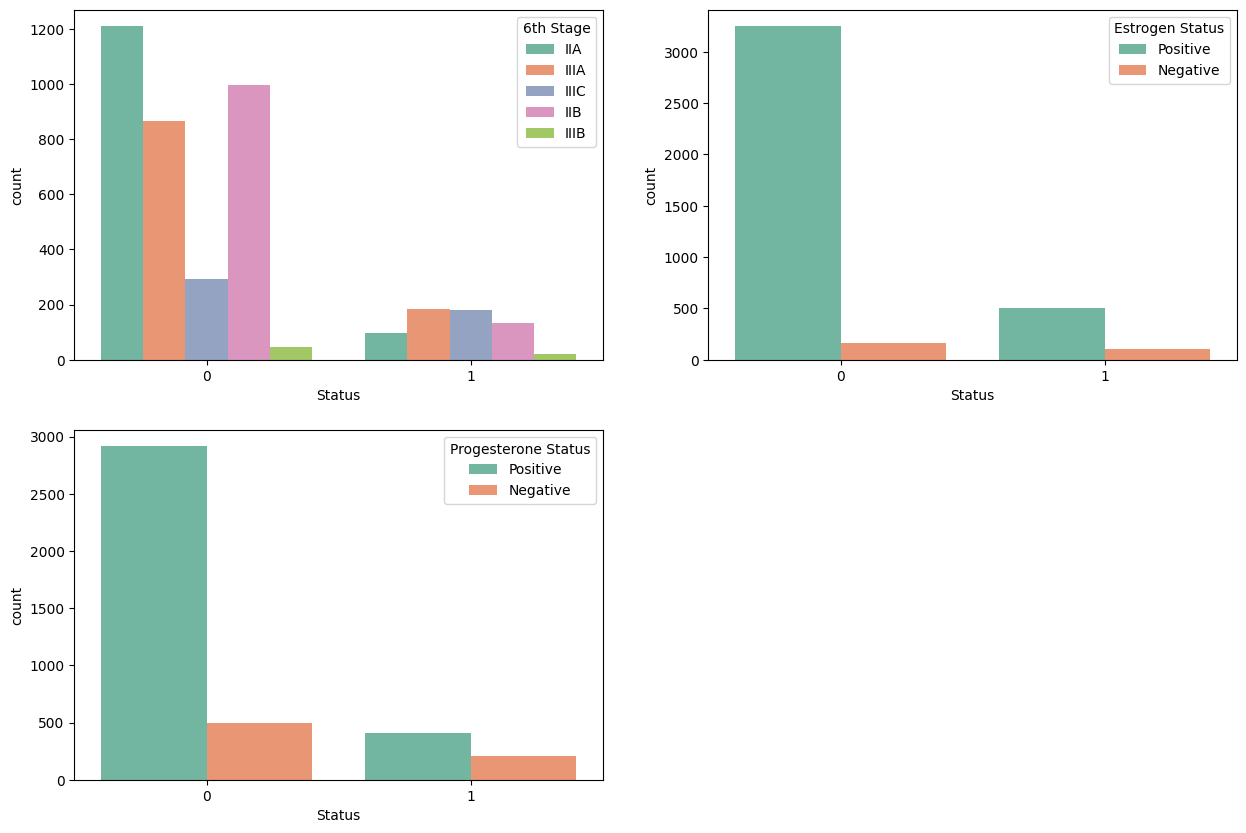

In [18]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
sns.countplot(x = 'Status', hue= '6th Stage', palette='Set2', data = df)

plt.subplot(2,2,2)
sns.countplot(x = 'Status', hue= 'Estrogen Status', palette='Set2', data = df)

plt.subplot(2,2,3)
sns.countplot(x = 'Status', hue= 'Progesterone Status', palette='Set2', data = df)

In [19]:
X = df1.drop('Status',axis=1)
y = df1['Status']

In [20]:
df1

,Age,Race,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,0,4,24,1,60,0
1,50,0,35,14,5,62,0
2,58,0,63,14,7,75,0
3,58,0,18,2,1,84,0
4,47,0,41,3,1,50,0
...,...,...,...,...,...,...,...
4019,62,2,9,1,1,49,0
4020,56,0,46,14,8,69,0
4021,68,0,22,11,3,69,0
4022,58,1,44,11,1,72,0


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

model_LogisticRegression = LogisticRegression()
model_LogisticRegression.fit(X_train, y_train)

model_RandomForestClassifier = RandomForestClassifier(n_estimators = 200)
model_RandomForestClassifier.fit(X_train,y_train)

model_HistGradientBoostingClassifier = HistGradientBoostingClassifier(max_bins=10, learning_rate=0.6)
model_HistGradientBoostingClassifier.fit(X_train, y_train)

model_GaussianNB = GaussianNB()
model_GaussianNB.fit(X_train, y_train)

GaussianNB()

In [23]:
Y_Pred_LogisticRegression = model_LogisticRegression.predict(X_test)
Y_Pred_RandomForestClassifier = model_RandomForestClassifier.predict(X_test)
Y_Pred_HistGradientBoostingClassifier = model_HistGradientBoostingClassifier.predict(X_test)
Y_Pred_GaussianNB = model_GaussianNB.predict(X_test)

In [30]:
print("Accuracy LogisticRegression: ", str(int(accuracy_score(y_test, Y_Pred_LogisticRegression) * 100)) + "%")
print("Accuracy RandomForestClassifiery: ", str(int(accuracy_score(y_test, Y_Pred_RandomForestClassifier) * 100)) + "%")
print("Accuracy HistGradientBoostingClassifier: ", str(int(accuracy_score(y_test, Y_Pred_HistGradientBoostingClassifier) * 100)) + "%")
print("Accuracy GaussianNB: ", str(int(accuracy_score(y_test, Y_Pred_GaussianNB) * 100)) + "%")

Accuracy LogisticRegression:  89%
Accuracy RandomForestClassifiery:  90%
Accuracy HistGradientBoostingClassifier:  87%
Accuracy GaussianNB:  87%


auc LogisticRegression:  0.8390567765567765
auc RandomForestClassifier:  0.8158482142857143
auc HistGradientBoostingClassifier:  0.8026785714285715
auc GaussianNB:  0.8191792582417582


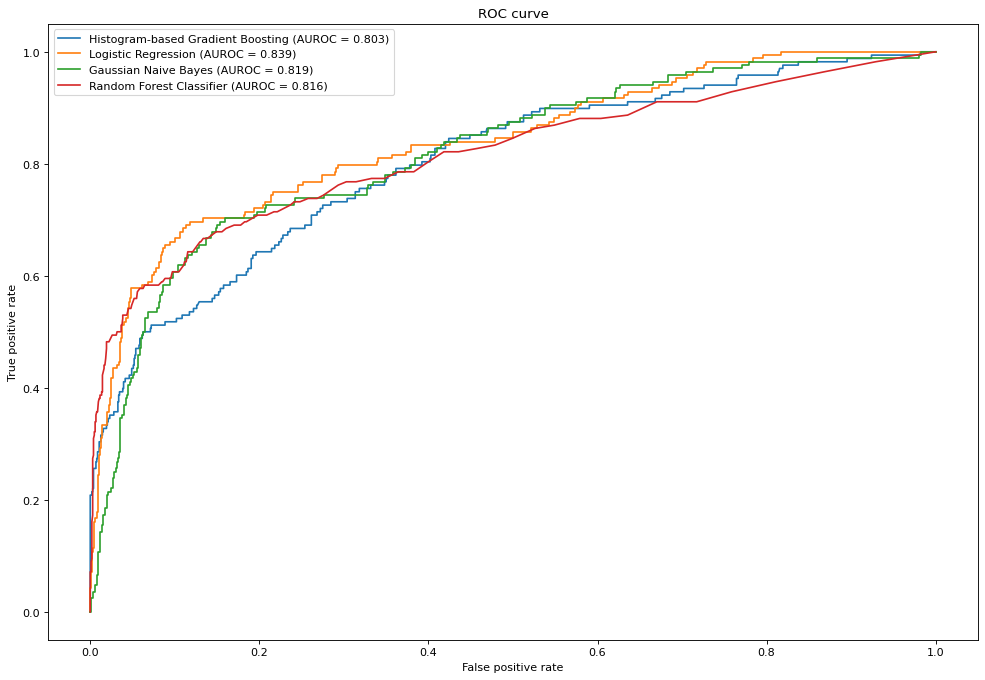

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
from sklearn.metrics import roc_curve, auc
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=80)

Y_Pred_ay_LogisticRegression = model_LogisticRegression.predict_proba(X_test)
Y_Pred_LogisticRegression = model_LogisticRegression.predict(X_test)

Y_Pred_ay_RandomForestClassifier = model_RandomForestClassifier.predict_proba(X_test)
Y_Pred_RandomForestClassifier = model_RandomForestClassifier.predict(X_test)

Y_Pred_ay_HistGradientBoostingClassifier = model_HistGradientBoostingClassifier.predict_proba(X_test)
Y_Pred_HistGradientBoostingClassifier = model_HistGradientBoostingClassifier.predict(X_test)

Y_Pred_ay_GaussianNB = model_GaussianNB.predict_proba(X_test)
Y_Pred_GaussianNB = model_GaussianNB.predict(X_test)

Y_Pred_ay_LogisticRegression = Y_Pred_ay_LogisticRegression[:, 1]
Y_Pred_RandomForestClassifier = Y_Pred_ay_RandomForestClassifier[:, 1]
Y_Pred_ay_HistGradientBoostingClassifier = Y_Pred_ay_HistGradientBoostingClassifier[:, 1]
Y_Pred_ay_GaussianNB = Y_Pred_ay_GaussianNB[:, 1]

fpr_rf_LogisticRegression, tpr_rf_LogisticRegression, thresholds_rf_LogisticRegression = roc_curve(y_test, Y_Pred_ay_LogisticRegression)
fpr_rf_RandomForestClassifier, tpr_rf_RandomForestClassifier, thresholds_rf__RandomForestClassifier = roc_curve(y_test, Y_Pred_RandomForestClassifier)
fpr_rf_HistGradientBoostingClassifier, tpr_rf_HistGradientBoostingClassifier, thresholds_rf_HistGradientBoostingClassifier = roc_curve(y_test, Y_Pred_ay_HistGradientBoostingClassifier)
fpr_rf_GaussianNB, tpr_rf_GaussianNB, thresholds_rf_GaussianNB = roc_curve(y_test, Y_Pred_ay_GaussianNB)

auc_rf_LogisticRegression = auc(fpr_rf_LogisticRegression, tpr_rf_LogisticRegression)
auc_rf_RandomForestClassifier = auc(fpr_rf_RandomForestClassifier, tpr_rf_RandomForestClassifier)
auc_rf_HistGradientBoostingClassifier = auc(fpr_rf_HistGradientBoostingClassifier, tpr_rf_HistGradientBoostingClassifier)
auc_rf_GaussianNB = auc(fpr_rf_GaussianNB, tpr_rf_GaussianNB)

print("auc LogisticRegression: ", auc_rf_LogisticRegression)
print("auc RandomForestClassifier: ", auc_rf_RandomForestClassifier)
print("auc HistGradientBoostingClassifier: ", auc_rf_HistGradientBoostingClassifier)
print("auc GaussianNB: ", auc_rf_GaussianNB)

fig1 = plt.gcf()

plt.figure(1)
# plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf_HistGradientBoostingClassifier, tpr_rf_HistGradientBoostingClassifier, label='Histogram-based Gradient Boosting (AUROC = {:.3f})'.format(auc_rf_HistGradientBoostingClassifier))
plt.plot(fpr_rf_LogisticRegression, tpr_rf_LogisticRegression, label='Logistic Regression (AUROC = {:.3f})'.format(auc_rf_LogisticRegression))
plt.plot(fpr_rf_GaussianNB, tpr_rf_GaussianNB, label='Gaussian Naive Bayes (AUROC = {:.3f})'.format(auc_rf_GaussianNB))
plt.plot(fpr_rf_RandomForestClassifier, tpr_rf_RandomForestClassifier, label='Random Forest Classifier (AUROC = {:.3f})'.format(auc_rf_RandomForestClassifier))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

from google.colab import files
fig1.savefig("ROC_Curve.png", dpi=200)
files.download("ROC_Curve.png") 

F1-score (aka F-Score / F-Measure)
Logistic Regression 0.5367647058823529
Random Forest Classifier 0.5963636363636363
Histogram-based Gradient Boosting 0.5163398692810458
Gaussian Naive Bayes 0.5256410256410257
Precision
Logistic Regression 0.7019230769230769
Random Forest Classifier 0.7663551401869159
Histogram-based Gradient Boosting 0.572463768115942
Gaussian Naive Bayes 0.5694444444444444
Recall (aka Sensitivity)
Logistic Regression 0.43452380952380953
Random Forest Classifier 0.4880952380952381
Histogram-based Gradient Boosting 0.47023809523809523
Gaussian Naive Bayes 0.4880952380952381
Specificity
Logistic Regression 0.9701923076923077
Random Forest Classifier 0.9759615384615384
Histogram-based Gradient Boosting 0.9432692307692307
Gaussian Naive Bayes 0.9403846153846154


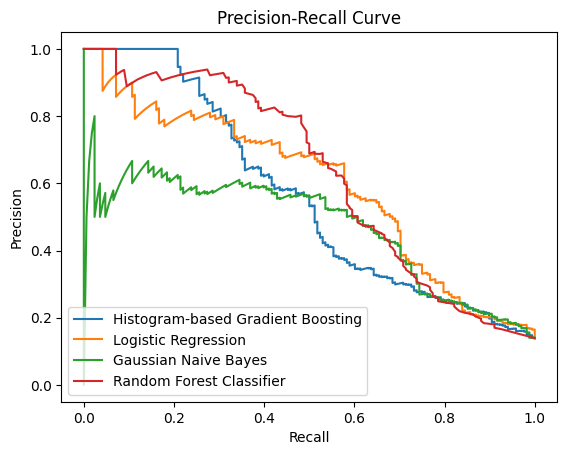

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix


Y_Pred_ay_LogisticRegression = model_LogisticRegression.predict_proba(X_test)
Y_LogisticRegression = model_LogisticRegression.predict(X_test)
Y_Pred_ay_RandomForestClassifier = model_RandomForestClassifier.predict_proba(X_test)
Y_RandomForestClassifier = model_RandomForestClassifier.predict(X_test)
Y_Pred_ay_HistGradientBoostingClassifier = model_HistGradientBoostingClassifier.predict_proba(X_test)
Y_HistGradientBoostingClassifier = model_HistGradientBoostingClassifier.predict(X_test)
Y_Pred_ay_GaussianNB = model_GaussianNB.predict_proba(X_test)
Y_GaussianNB = model_GaussianNB.predict(X_test)

Y_Pred_ay_LogisticRegression = Y_Pred_ay_LogisticRegression[:, 1]
Y_Pred_ay_RandomForestClassifier = Y_Pred_ay_RandomForestClassifier[:, 1]
Y_Pred_ay_HistGradientBoostingClassifier = Y_Pred_ay_HistGradientBoostingClassifier[:, 1]
Y_Pred_ay_GaussianNB = Y_Pred_ay_GaussianNB[:, 1]

lr_precision_LogisticRegression, lr_recall_LogisticRegression, _ = precision_recall_curve(y_test, Y_Pred_ay_LogisticRegression)
lr_precision_RandomForestClassifier, lr_recall_RandomForestClassifier, _ = precision_recall_curve(y_test, Y_Pred_ay_RandomForestClassifier)
lr_precision_HistGradientBoostingClassifier, lr_recall_HistGradientBoostingClassifier, _ = precision_recall_curve(y_test, Y_Pred_ay_HistGradientBoostingClassifier)
lr_precision_GaussianNB, lr_recall_GaussianNB, _ = precision_recall_curve(y_test, Y_Pred_ay_GaussianNB)


tn_ay_LogisticRegression, fp_ay_LogisticRegression, fn_ay_LogisticRegression, tp_ay_LogisticRegression = confusion_matrix(y_test, Y_LogisticRegression).ravel()
tn_ay_RandomForestClassifie, fp_ay_RandomForestClassifie, fn_ay_RandomForestClassifie, tp_ay_RandomForestClassifie = confusion_matrix(y_test, Y_RandomForestClassifier).ravel()
tn_ay_HistGradientBoostingClassifier, fp_ay_HistGradientBoostingClassifier, fn_ay_HistGradientBoostingClassifier, tp_ay_HistGradientBoostingClassifier = confusion_matrix(y_test, Y_HistGradientBoostingClassifier).ravel()
tn_ay_GaussianNB, fp_ay_GaussianNB, fn_ay_GaussianNB, tp_ay_GaussianNB = confusion_matrix(y_test, Y_GaussianNB).ravel()


precision_score_ay_LogisticRegression = tp_ay_LogisticRegression / (tp_ay_LogisticRegression + fp_ay_LogisticRegression)
recall_score_ay_LogisticRegression = tp_ay_LogisticRegression / (tp_ay_LogisticRegression + fn_ay_LogisticRegression)
specificity_ay_LogisticRegression = tn_ay_LogisticRegression / (tn_ay_LogisticRegression + fp_ay_LogisticRegression)
f1_ay_LogisticRegression = 2*(recall_score_ay_LogisticRegression * precision_score_ay_LogisticRegression) / (recall_score_ay_LogisticRegression + precision_score_ay_LogisticRegression)

precision_score_ay_RandomForestClassifier = tp_ay_RandomForestClassifie / (tp_ay_RandomForestClassifie + fp_ay_RandomForestClassifie)
recall_score_ay_RandomForestClassifier = tp_ay_RandomForestClassifie / (tp_ay_RandomForestClassifie + fn_ay_RandomForestClassifie)
specificity_ay_RandomForestClassifier = tn_ay_RandomForestClassifie / (tn_ay_RandomForestClassifie + fp_ay_RandomForestClassifie)
f1_ay_RandomForestClassifier = 2 * (recall_score_ay_RandomForestClassifier * precision_score_ay_RandomForestClassifier) / (recall_score_ay_RandomForestClassifier + precision_score_ay_RandomForestClassifier)

precision_score_ay_HistGradientBoostingClassifier = tp_ay_HistGradientBoostingClassifier / (tp_ay_HistGradientBoostingClassifier + fp_ay_HistGradientBoostingClassifier)
recall_score_ay_HistGradientBoostingClassifier = tp_ay_HistGradientBoostingClassifier / (tp_ay_HistGradientBoostingClassifier + fn_ay_HistGradientBoostingClassifier)
specificity_ay_HistGradientBoostingClassifier = tn_ay_HistGradientBoostingClassifier / (tn_ay_HistGradientBoostingClassifier + fp_ay_HistGradientBoostingClassifier)
f1_ay_HistGradientBoostingClassifier = 2 * (recall_score_ay_HistGradientBoostingClassifier * precision_score_ay_HistGradientBoostingClassifier) / (recall_score_ay_HistGradientBoostingClassifier + precision_score_ay_HistGradientBoostingClassifier)

precision_score_ay_GaussianNB = tp_ay_GaussianNB / (tp_ay_GaussianNB + fp_ay_GaussianNB)
recall_score_ay_GaussianNB = tp_ay_GaussianNB / (tp_ay_GaussianNB + fn_ay_GaussianNB)
specificity_ay_GaussianNB = tn_ay_GaussianNB / (tn_ay_GaussianNB + fp_ay_GaussianNB)
f1_ay_GaussianNB = 2 * (recall_score_ay_GaussianNB * precision_score_ay_GaussianNB) / (recall_score_ay_GaussianNB + precision_score_ay_GaussianNB)

print("F1-score (aka F-Score / F-Measure)")

print("Logistic Regression", f1_ay_LogisticRegression)
print("Random Forest Classifier", f1_ay_RandomForestClassifier)
print("Histogram-based Gradient Boosting", f1_ay_HistGradientBoostingClassifier)
print("Gaussian Naive Bayes", f1_ay_GaussianNB)

print("Precision")

print("Logistic Regression", precision_score_ay_LogisticRegression)
print("Random Forest Classifier", precision_score_ay_RandomForestClassifier)
print("Histogram-based Gradient Boosting", precision_score_ay_HistGradientBoostingClassifier)
print("Gaussian Naive Bayes", precision_score_ay_GaussianNB)

print("Recall (aka Sensitivity)")

print("Logistic Regression", recall_score_ay_LogisticRegression)
print("Random Forest Classifier", recall_score_ay_RandomForestClassifier)
print("Histogram-based Gradient Boosting", recall_score_ay_HistGradientBoostingClassifier)
print("Gaussian Naive Bayes", recall_score_ay_GaussianNB)

print("Specificity")

print("Logistic Regression", specificity_ay_LogisticRegression)
print("Random Forest Classifier",  specificity_ay_RandomForestClassifier)
print("Histogram-based Gradient Boosting",  specificity_ay_HistGradientBoostingClassifier)
print("Gaussian Naive Bayes",  specificity_ay_GaussianNB)

fig1 = plt.gcf()

# plt.rcParams['figure.figsize'] = [20, 15]
plt.figure(1)

plt.plot(lr_recall_HistGradientBoostingClassifier, lr_precision_HistGradientBoostingClassifier, label='Histogram-based Gradient Boosting')
plt.plot(lr_recall_LogisticRegression, lr_precision_LogisticRegression, label='Logistic Regression')
plt.plot(lr_recall_GaussianNB, lr_precision_GaussianNB, label='Gaussian Naive Bayes')
plt.plot(lr_recall_RandomForestClassifier, lr_precision_RandomForestClassifier, label='Random Forest Classifier')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.title('Precision-Recall Curve')
plt.show()

from google.colab import files
fig1.savefig("Precision-Recall.png", dpi=200)
files.download("Precision-Recall.png") 